In [ ]:
#knn
#모든 특성을 고르게 반영하기 위해 정규화 필요
#k가 너무 작으면 오버피팅 / 반대도 발생 가능

from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

iris = load_iris()
features = iris.data
standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)

#k=2
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)
new_observation = [1,1,1,1]

distances, indices = nearest_neighbors.kneighbors([new_observation])
print('최근접 이웃 확인:', features_standardized[indices])

nearestneighbors_euclidean = NearestNeighbors(n_neighbors=2, metric='euclidean').fit(features_standardized)
distances

In [ ]:
#k=3
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=3, metric="euclidean").fit(features_standardized) 

nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(features_standardized).toarray()
for i, x in enumerate(nearest_neighbors_with_self):
    x[i] = 0
    
nearest_neighbors_with_self[0]

# 첫 번째 샘플에 대한 두 개의 최근접 이웃을 확인합니다.
print(nearest_neighbors_with_self[0])

# 이 샘플과 가장 가까운 이웃의 다섯개의 인덱스를 찾습니다.
indices = nearest_neighbors.kneighbors([new_observation], n_neighbors=5, return_distance=False)
features_standardized[indices] # 최근접 이웃을 확인

# 반경 0.5 안에 있는 모든 샘플의 인덱스를 찾습니다.
indices = nearest_neighbors.radius_neighbors([new_observation], radius=0.5, return_distance=False)
features_standardized[indices[0]] # 반경 내의 이웃을 확인

# 반경 내의 이웃을 나타내는 리스트의 리스트
nearest_neighbors_with_self = nearest_neighbors.radius_neighbors_graph( [new_observation], radius=0.5).toarray()
nearest_neighbors_with_self[0] # 첫 번째 샘플에 대한 반경 내의 이웃을 확인

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

iris = datasets.load_iris() # 데이터 로드
X = iris.data
y = iris.target

standardizer = StandardScaler() # 표준화 객체
X_std = standardizer.fit_transform(X) # 특성을 표준화

# 5개의 이웃을 사용한 KNN 분류기를 훈련합니다.
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)
new_observations = [[0.75, 0.75, 0.75, 0.75],
                    [1, 1, 1, 1]] # 두 개의 샘플을 만듭니다.

print(knn.predict(new_observations)) # 두 샘플의 클래스를 예측
print(knn.predict_proba(new_observations)) # 각 샘플이 세 클래스에 속할 확률을 확인

In [ ]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets

boston = datasets.load_boston() # 데이터 로드
features = boston.data[:,0:2] #두 개의 특성만 선택
target = boston.target

knn_regressor = KNeighborsRegressor(n_neighbors=10) # 최근접 회귀 모델 객체 생성
model = knn_regressor.fit(features, target) # 모델 훈련

# 첫 번째 샘플의 타깃 값을 예측하고 1000을 곱합니다.
print(model.predict(features[0:1])[0]*1000)

import numpy as np
indices = model.kneighbors(features[0:1], return_distance=False) #첫 예측값의 neighbors의 index인 indices
np.mean(target[indices]) * 1000 #단위가 천 달러이므로 곱하기 1000

In [ ]:
#GridSearchCV로 KNN의 k값 결정
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

standardizer = StandardScaler() # 표준화 객체 생성
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1) # KNN 분류기 객체 생성
pipe = Pipeline([("standardizer", standardizer),
                 ("knn", knn)]) # 파이프라인 생성

# 탐색 영역의 후보를 만듭니다.
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# 그리드 서치 객체 생성
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(features, target)

# 최선의 이웃 개수 (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

iris = datasets.load_iris() #데이터 로드
features = iris.data
target = iris.target

standardizer = StandardScaler() #표준화 객체 생성
features_standardized = standardizer.fit_transform(features) #특성을 표준화

#반지름 이웃 분류기를 훈련합니다.
rnn = RadiusNeighborsClassifier(radius=.5, n_jobs=-1).fit(features_standardized, target)
new_observations = [[1, 1, 1, 1]] #두 개의 샘플을 만듭니다.
rnn.predict(new_observations) #두 샘플의 클래스를 예측

#반지름 이웃 분류기를 훈련합니다.
rnn = RadiusNeighborsClassifier(radius=.5, outlier_label=-1, n_jobs=-1).fit(features_standardized, target)
rnn.predict([[100, 100, 100, 100]]) #값이 너무 커서 outlier?

In [ ]:
#svm
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris() # 데이터 로드
features = iris.data[:100,:2] #두 개의 클래스와 두 개의 특성만 선택
target = iris.target[:100]

scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)

svc = LinearSVC(C=1.0) # 서포트 벡터 분류기 생성
model = svc.fit(features_standardized, target) # 모델 훈련

In [ ]:
from matplotlib import pyplot as plt
# 클래스를 색으로 구분한 산점도를 그립니다.
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)
w = svc.coef_[0] # 초평면을 만듭니다.
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]
plt.plot(xx, yy) # 초평면을 그립니다.
plt.axis("off"), plt.show();
new_observation = [[ -2, 3]] # 새로운 샘플을 만듭니다.
svc.predict(new_observation) # 새로운 샘플의 클래스를 예측
svc.decision_function(new_observation)

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(0) # 랜덤 시드를 지정
features = np.random.randn(200, 2) # 두 개의 특성을 만듭니다.
# XOR 연산(이것이 무엇인지 알 필요는 없습니다)을 사용하여
# 선형적으로 구분할 수 없는 클래스를 만듭니다.
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)
# 방사 기저 함수 커널을 사용한 서포트 벡터 머신을 만듭니다.
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
model = svc.fit(features, target) # 분류기 훈련

In [ ]:
# 샘플과 결정 경계를 그립니다.
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier):
cmap = ListedColormap(("red", "blue"))
xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
for idx, cl in enumerate(np.unique(y)):
plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
alpha=0.8, c=cmap.colors[idx],
marker="+", label=cl)
# 선형 커널을 사용한 서포트 벡터 분류기를 만듭니다.
svc_linear = SVC(kernel="linear", random_state=0, C=1)
svc_linear.fit(features, target) # 모델 훈련
plot_decision_regions(features, target, classifier=svc_linear) # 샘플과 초평면을 그립니다.
plt.axis("off"), plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target
scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)
# 서포트 벡터 분류기 객체 생성
svc = SVC(kernel="linear", probability=True, random_state=0)
model = svc.fit(features_standardized, target) # 분류기 훈련
new_observation = [[.4, .4, .4, .4]] #New Sample Data
model.predict_proba(new_observation) # 예측 확률 확인

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris() #데이터 로드
features = iris.data[:100,:] #두 개의 클래스만 선택
target = iris.target[:100]
scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)
svc = SVC(kernel="linear", random_state=0) # 서포트 벡터 분류기 객체 생성
model = svc.fit(features_standardized, target) # 분류기 훈련
model.support_vectors_ # 서포트 벡터를 확인
model.support_

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris() #데이터 로드
features = iris.data[:100,:] #두 개의 클래스만 선택
target = iris.target[:100]
features = features[40:,:] # 처음 40개 샘플을 제거
target = target[40:] #불균형한 클래스를 만듭니다.
# 타깃 벡터에서 0이 아닌 클래스는 모두 1로 만듭니다.
target = np.where((target == 0), 0, 1)
scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)
model = svc.fit(features_standardized, target) # 분류기 훈련

In [ ]:
#Naive Bayes
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target
classifer = GaussianNB() # 가우시안 나이브 베이지 객체 생성
model = classifer.fit(features, target) # 모델 훈련
new_observation = [[ 4, 4, 4, 0.4]] #New Sample Data
model.predict(new_observation) # 클래스 예측
# 각 클래스별 사전 확률을 지정한 가우시안 나이브 베이즈 객체 생성
clf = GaussianNB(priors=[0.25, 0.25, 0.5])
model = classifer.fit(features, target) # 모델 훈련
model.predict(new_observation)

In [ ]:
#이산적인 카운트 특성으로 분류기 훈련
#텍스트 분류 예측
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

text_data = np.array(['I love Brazil. Brazil!',
                      'Brazil is best',
                      'Germany beats both'])
count = CountVectorizer() #bag of words 객체 생성
bag_of_words = count.fit_transform(text_data)
features = bag_of_words.toarray()
target = np.array([0,0,1])

#MultinomialNB를 사용해 두 클래스(brazil과 germany)에 대한 사전 확률을 지정하여 모델을 훈련
#각 클래스별 사전확률을 지정한 다항 나이브 베이즈 객체 생성
clf = MultinomialNB(class_prior=[0.25,0.5])
model = clf.fit(features, target)
new_observation = ([[0,0,0,1,0,1,0],
                   [1,1,0,1,0,0,0]])
model.predict(new_observation)

In [ ]:
#이진 특성으로 나이브 베이지 분류기 훈련(베르누이)

import numpy as np
from sklearn.naive_bayes import BernoulliNB

#세 개의 이진 특성을 만듭니다
features = np.random.randint(2, size=(100,3))

#이진 타깃 벡터를 만듭니다.
target = np.random.randint(2, size=(100,1)).ravel()

#각 클래스별 사전 확률을 지정하여 베르누이 나이브 베이즈 객체 생성
clf = BernoulliNB(class_prior=[0.25,0.5])
model = clf.fit(features,target)

#10개의 observations에 대한 예측
model.predict(np.random.randint(2, size=(10,3)))

#clf = BernoulliNB(class_prior=None, fit_prior=False)

In [ ]:
#나이브 베이즈에서는 타깃 클래스에 대한 예측 확률의 순위는 유효하지만
#예측 확률이 0 또는 1에 극단적으로 가까워지는 경향이 있음
#이를 CalibratedClassifierCV 를 이용해 보정하여 의미 있는 예측 확률을 얻을 수 있음
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

from sklearn.calibration import CalibratedClassifierCV

iris = datasets.load_iris()
features = iris.data
target = iris.target

#가우시안 나이브 객체를 생성
clf = GaussianNB()

#시그모이드 보정을 사용해 보정 교차 검증을 만듭니다.
clf_sigmoid = CalibratedClassifierCV(clf, cv=2, method='sigmoid')
clf_sigmoid.fit(features, target)

new_observation = [[2.6,2.6,2.6,0.4]]

print('원본 확률값:', clf.fit(features, target).predict_proba(new_observation)) #원본 분류기의 확률값들
print('보정된 값:', clf_sigmoid.predict_proba(new_observation)) #보정한 확률값

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(["첫번째 문서 테스트", "두번째 문서 테스트"])

#['두번째', '문서', '첫번째', '테스트'] - 단어 오름차순?
print(vectorizer.vocabulary_)

counts = vectorizer.transform(['직접 첫번째 테스트 두번째 테스트'])
counts.toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
#clf.fit(counts, )

In [ ]:
#clustering - 비지도 학습, 샘플의 그룹 식별
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

iris = datasets.load_iris() # 데이터 로드
features = iris.data

scaler = StandardScaler() # 특성 표준화
features_std = scaler.fit_transform(features)

cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1) # k-평균 객체 생성
model = cluster.fit(features_std) # 모델 훈련

print('예측', model.labels_) # 예측 클래스 확인
print('실제', iris.target) # 진짜 클래스 확인

new_observation = [[0.8, 0.8, 0.8, 0.8]] #New Sample Data
print('예측:', model.predict(new_observation)) # 샘플의 클러스터를 예측
model.cluster_centers_ #중심점에 가장 가까운 샘플들(세 개) 출력

In [ ]:
model.inertia_
model.score(features_std)
model.transform(new_observation)

inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=0, n_jobs=-1)
    inertia.append(kmeans.fit(features_std).inertia_)

#시각화
import matplotlib.pyplot as plt
plt.plot(range(1, 10), inertia)
plt.show()

In [ ]:
#미니배치 k-평균은 랜덤 샘플에 대해서만 수행 - 성능을 조금 희생하고 학습 시간 대폭 줄임
#매개변수 batch_size는 각 배치에 선택할 샘플의 수

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

cluster = MiniBatchKMeans(n_clusters=3,
                          random_state=0,
                          batch_size=100)
model = cluster.fit(features_std)
model.labels_

In [ ]:
mb_kmeans = MiniBatchKMeans()
for i in range(3):
    mb_kmeans.partial_fit(features_std[i*50:(i+1)*50])
    #훈련 세트가 너무 클 때 하나의 넘파이 배열로 전달하기 어려움
    #데이터를 조금씩 전달하며 훈련하는 partial_fit() 사용

mb_kmeans.labels_

In [ ]:
#평균이동을 사용한 군집 - 거리 중심이 아닌 밀도 중심?
#클러스터 수와 모양을 가정하지 않음
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

iris = datasets.load_iris()
features = iris.data

scaler = StandardScaler()
features_std = scaler.fit_transform(features)

cluster = MeanShift(n_jobs=-1)
model = cluster.fit(features_std)

print(model.labels_)
print(model.cluster_centers_) #중심점에 가장 가까운 샘플 둘 출력

In [ ]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data,
                       columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
kmeans = KMeans(n_clusters=3, init='k-means++',
               max_iter=300, random_state=0)
kmeans.fit(iris_df)

print(kmeans.labels_)

iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_result = iris_df.groupby(['target', 'cluster'])['sepal_width'].count()
#target과 cluster로 묶어서 count로 출력(count할 index는 상관 x 세기만 하면 됨)
print(iris_result)

전통적인 K-Means는 아래와 같은 원리로 진행된다.

일단 K개의 임의의 중심점(centroid)을 배치하고 각 데이터들을 가장 가까운 중심점으로 할당한다. (일종의 군집을 형성한다.) 군집으로 지정된 데이터들을 기반으로 해당 군집의 중심점을 업데이트한다. 2번, 3번 단계를 그래서 수렴이 될 때까지, 즉 더이상 중심점이 업데이트 되지 않을 때까지 반복한다. 그러나 K-Means++는 좀 다르다. K-Means에서 가장 첫번째 단계, 즉 중심점을 배치하는 걸 그냥 임의로 하는 대신 좀 더 신중하게(?) 하는 거다.

(일단 아무 공간에나 중심점을 k개 찍고 시작하는 게 아니라) 가지고 있는 데이터 포인트 중에서 무작위로 1개를 선택하여 그 녀석을 첫번째 중심점으로 지정한다. 나머지 데이터 포인트들에 대해 그 첫번째 중심점까지의 거리를 계산한다. 두번째 중심점은 각 점들로부터 거리비례 확률에 따라 선택한다. (뭔 소리야?) 즉, 이미 지정된 중심점으로부터 최대한 먼 곳에 배치된 데이터포인트를 그 다음 중심점으로 지정한다는 뜻이다. 중심점이 k개가 될 때까지 2, 3번을 반복한다.

In [8]:
#클러스터 알고리즘 테스트
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=200, n_features=2,
                  centers=3, cluster_std=0.8,
                  random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [9]:
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head(10)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
5,-0.908302,1.970778,2
6,2.472119,0.437033,1
7,1.656842,2.441289,1
8,1.077800,4.625379,0
9,-1.679427,2.602003,2


In [10]:
#KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

In [11]:
#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', 'p', 'P', 'D', 'H', 'x']

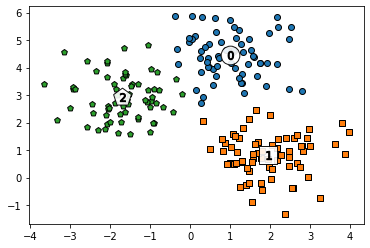

In [13]:
#군집된 label 유형별로 iteration 하면서 marker별로 scatter plot 시각화
#먼저 샘플들 시각화
import matplotlib.pyplot as plt

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'],
                y=label_cluster['ftr2'],
                edgecolor='k',
                marker=markers[label]) #마커 모양
    
    #군집별 중심 위치 좌표 시각화
    #하얀 중심원
    plt.scatter(x=center_x_y[0], y=center_x_y[1],
               s=350, color='white', alpha=0.9,
               edgecolor='k', marker=markers[label]) #샘플의 마커 모양 따라서
    #그 안에 군집 숫자
    plt.scatter(x=center_x_y[0], y=center_x_y[1],
               s=70, color='k', edgecolor='k',
                marker='$%d$' % label) #중심 좌표에 라벨 숫자 표시    
plt.show()

In [ ]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

In [ ]:
iris = datasets.load_iris()
feature_names = ['sepal_length', 'sepal_width',
                 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data,
                       columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++',
               max_iter=300, random_state=0).fit(iris_df)
iris_df['cluster'] = kmeans.labels_ #예측 군집을 df에 추가

In [ ]:
from sklearn.metrics import silhouette_samples

#iris의 모든 개별 데이터에 실루엣 계수값을 구함
#실루엣 계수: -1~1, 1에 가까울수록 군집화가 잘 된 것
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#iris_df에 실루엣 계수 컬럼 추가
iris_df['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수값을 구함
average_score = np.mean(score_samples)
print('total average silhouette score', average_score)
iris_df.groupby('cluster')['silhouette_coeff'].mean()

In [ ]:
#Density-based Spatial Clustering of Applications with Noise, DBSCAN
#각각의 데이터들에 대해 이웃한 데이터와의 밀도를 계산하며 불특정한 모양의 클러스터를 생성
#pdf. 14, page. 13

#매개변수 eps: 다른 샘플을 이웃으로 고려하기 위한 최대 거리
#min_samples: 핵심 샘플이 되기 위한 eps 내 필요 최소 샘플 수
#metric: eps에서 사용할 거리 측정 방식
#찾은 핵심 샘플의 인덱스는 core_sample_indices_ 속성에 저장됨
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

cluster = DBSCAN(n_jobs=-1)
model = cluster.fit(features_std)
model.labels_
model.core_sample_indices_
cluster.fit_predict(features_std)
#-1, 0 1 세 개의 군집으로 나뉘는 듯

In [ ]:
#계층적 병합을 사용한 군집
#모든 샘플이 각자 하나의 클러스터로 시작 - 조건에 부합하는 클러스터끼리 병합
#종료 조건 도달까지 계속 클러스터가 커짐
#ex) 매개변수 linkage에 따라 조건 달라짐
#- ward 분산, average 샘플 간 평균 거리, complete 샘플 간 최대 거리 최소화하는 병합 전략
#single 두 클러스터 샘플 간의 최소 거리를 최소화하는 병합 전략

#affinity: linkage에서 사용할 거리 측정 방식 (minkowski, euclidean 등)
#n_clusters: 찾을 클러스터 수 (종료 조건?)
#labels_ 속성을 사용해 각 샘플이 속한 클러스터 확인 가능

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering as AggClustering

iris = datasets.load_iris()
features = iris.data

scaler = StandardScaler()
features_std = scaler.fit_transform(features)

cluster = AggClustering(n_clusters=3)
model = cluster.fit(features_std)
model.labels_ #클러스터 소속 확인

In [ ]:
cluster.fit_predict(features_std) #그냥 predict는 없고 fit_predict 써야함

In [ ]:
#이차원 시각화 위한 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris() #데이터 로드

feature_names = ['sepal_length', 'sepal_width',
                 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data,
                       columns=feature_names) #데이터 df화

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8,
               metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels #dbscan으로 예측한 라벨
iris_df['target'] = iris.target #실제 라벨

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result

In [ ]:
#2차원으로 시각화하기 위해 PCA 이용하여 2차원으로 내림
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

#visualize_cluster_plot() 함수는 df 안의 ftr1과 ftr2 열을 이용해 시각화하므로
#PCA 변환값을 df의 ftr1, ftr2로 삽입
iris_df['ftr1'] = pca_transformed[:,0]
iris_df['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_df,
                       'dbscan_cluster',
                       iscenter=False)

In [ ]:
#Density-based Spatial Clustering of Applications with Noise, DBSCAN
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris() #데이터 로드

feature_names = ['sepal_length', 'sepal_width',
                 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data,
                       columns=feature_names) #데이터 df화

from sklearn.cluster import DBSCAN

#eps=0.8인 경우
dbscan = DBSCAN(eps=0.8, min_samples=8,
               metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels #dbscan으로 예측한 라벨
iris_df['target'] = iris.target #실제 라벨

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result
#훨씬 잘 분류함

In [ ]:
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

#visualize_cluster_plot() 함수는 df 안의 ftr1과 ftr2 열을 이용해 시각화하므로
#PCA 변환값을 df의 ftr1, ftr2로 삽입
iris_df['ftr1'] = pca_transformed[:,0]
iris_df['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_df,
                       'dbscan_cluster',
                       iscenter=False)
#핵심 샘플에 더 많이 포함됨